In [4]:
#implentation of gradient descent 
import pandas as pd 
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [5]:
#dataset
x_train = np.array([1.0, 2.0]) #feature 
y_train = np.array([300.0, 500.0])#target


In [6]:
#compute_Cost_Function
def compute_cost(x, y, w, b):

    m=x.shape[0]#shape of data
    cost = 0

    for i in range(m):
        f_wb = w*x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2*m) * cost
    return total_cost
    

<h3>Implement Gradient Descent</h3>
<ol>
    <li>compute_gradinet</li>
    <li>compute_cost</li>
    <li>gradient_descent</li>
</ol>

In [8]:
#compute_gradient
"""
    dj(w,b)/dw = dj_dw => partial derivative of j(w,b) w.r.t to dw
"""
def compute_gradient(x, y, w, b):
    """
    dj_dw and dj_db
    """
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range (m):
        f_wb = w*x[i] + b
        dj_dw_i = (f_wb - y[i])* x[i]
        dj_db_i = (f_wb - y[i]) 
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_dw, dj_db

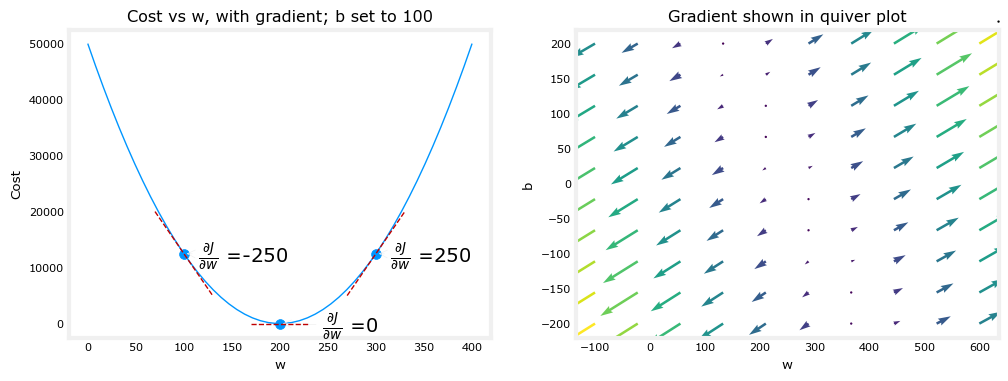

In [9]:
plt_gradients(x_train, y_train, compute_cost, compute_gradient)
plt.show()

<h3>Gradient Descent</h3>
<ol>
    <li>already implmented cost_compute, compute gradient, w, b </li>
    <li>but still alpha i.e. learning rate, iterations </li>
    <li>then w_in, b_in (initialize) and all and all together ok</li>
</ol>

In [11]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Args
    x(ndarray (m,)) : Data, m examples
    y(ndarray(m, )) : target values
    w_in, b_in : initial values of model parameters
    aplha : learning rate
    num_iters : number of iterations to run gradient descent untill it converge and reach global minima
    cost_function : fucntion to call to produce cost
    gradient_function : function to call to produce gradient

    Return
    w : update valeus of w
    b : update values of j
    j_history = histor of cost values 
    p_history = history of parameters 
    An array to store cost value of J and w's at each iteration 
    """
    J_history = [] #cost values
    p_history = [] # parameters 
    b = b_in
    w = w_in

    for i in range(num_iters):
        #this will calculate the gradeint and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b)
        #update parameters using  equation 
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        #save cost j ar each iteration 
        if i< 10000: # this will allow to run as much iteration needed 
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w,b])
        #print cost function after every 10 iteration 
        if i% math.ceil(num_iters/10) == 0:
            print(f"iteration{i:4}: Cost{J_history[-1] : 0.2e} ",
                  f"dj_dw: {dj_dw:0.3e}, dj_db: {dj_db: 0.3e}",
                  f"w: {w:0.3e}, b:{b: 0.5e}")
    return w, b, J_history, p_history
        
    

In [12]:
w_init = 0
b_init = 0

iteration = 10000
tmp_alpha = 1.0e-2

#run gradient descent 
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha,
                                                    iteration, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent : ({w_final:8.4f}, {b_final:8.4f})")

iteration   0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02 w: 6.500e+00, b: 4.00000e+00
iteration1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01 w: 1.949e+02, b: 1.08228e+02
iteration2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01 w: 1.975e+02, b: 1.03966e+02
iteration3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01 w: 1.988e+02, b: 1.01912e+02
iteration4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02 w: 1.994e+02, b: 1.00922e+02
iteration5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02 w: 1.997e+02, b: 1.00444e+02
iteration6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02 w: 1.999e+02, b: 1.00214e+02
iteration7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03 w: 1.999e+02, b: 1.00103e+02
iteration8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03 w: 2.000e+02, b: 1.00050e+02
iteration9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03 w: 2.000e+02, b: 1.00024e+02
(w,b) found by gradient descent : (199.9

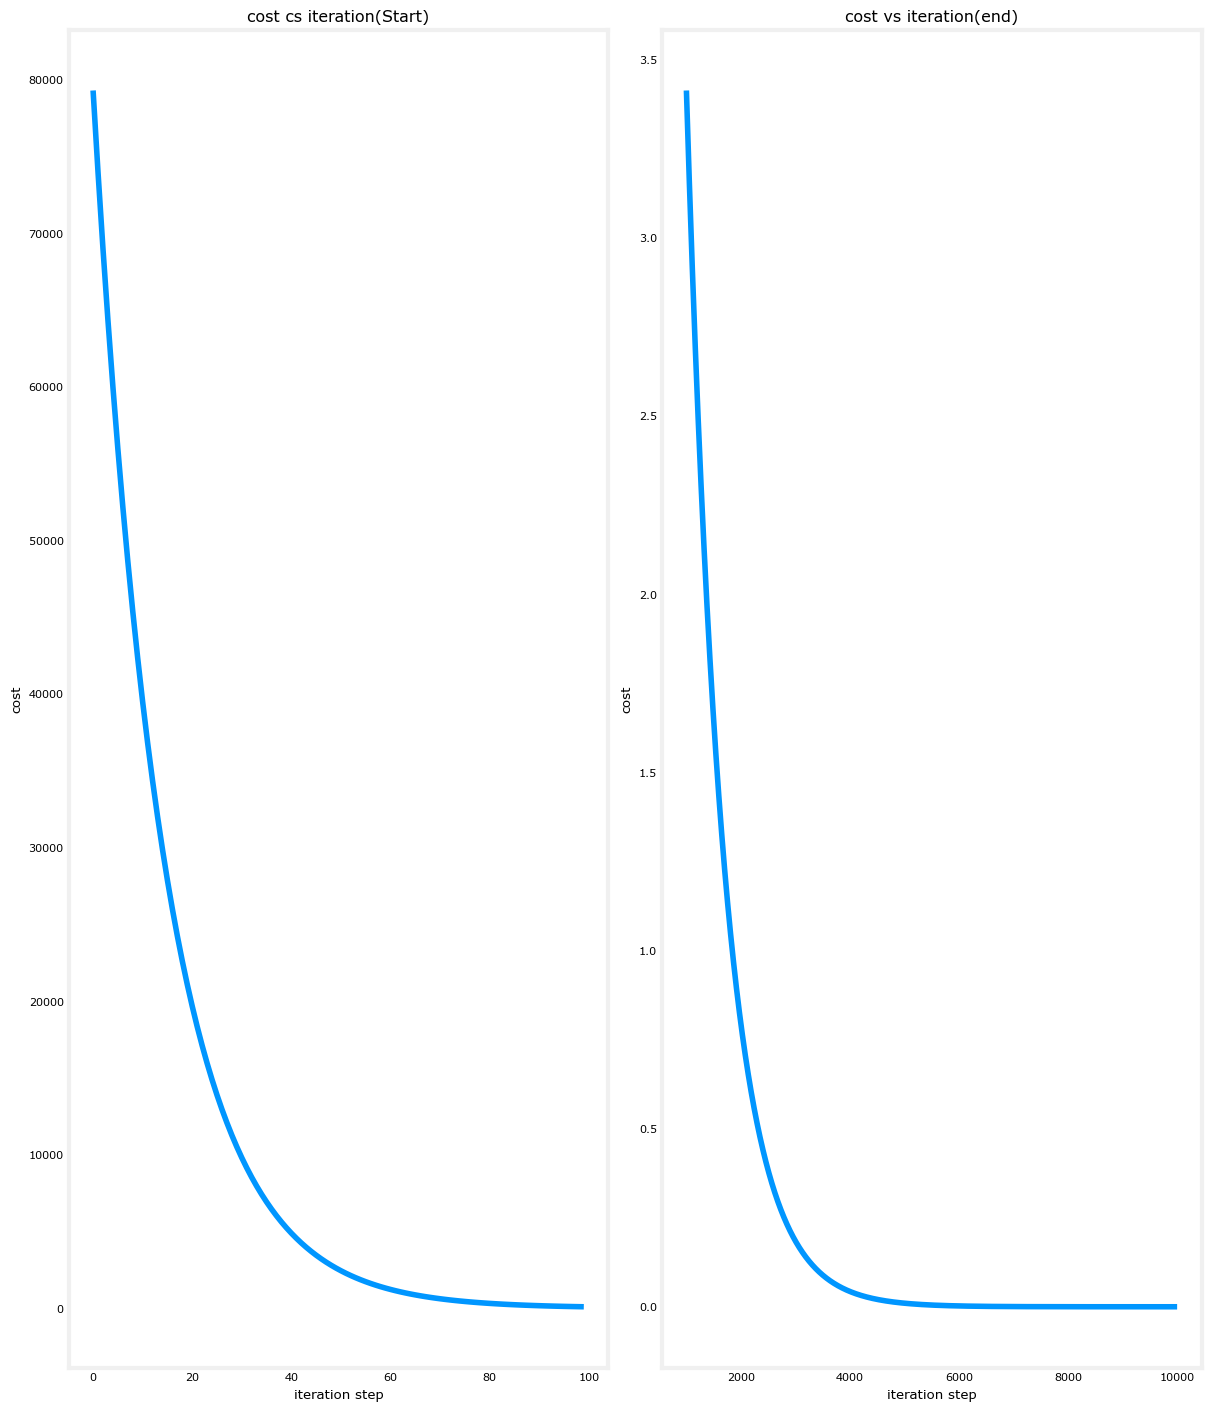

In [16]:
#cost vs Iteration of gradient descent
fig, (ax1, ax2) = plt.subplots(1,2, constrained_layout = True, figsize=(12,14))
ax1.plot(J_hist[:100])
ax2.plot(1000+np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("cost cs iteration(Start)"); ax2.set_title("cost vs iteration(end)")
ax1.set_ylabel("cost"); ax2.set_ylabel("cost")
ax1.set_xlabel("iteration step"); ax2.set_xlabel("iteration step")
plt.show()

In [20]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


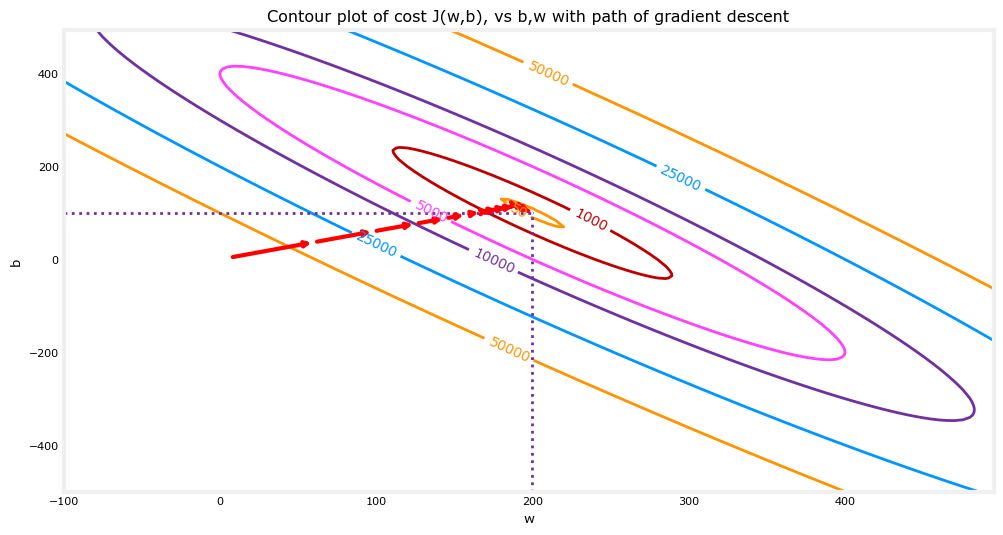

In [32]:
fig, ax = plt.subplots(1, 1,figsize=(12,6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)

In [36]:
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 10
tmp_alpha = 8.0e-1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

iteration   0: Cost 2.58e+05  dj_dw: -6.500e+02, dj_db: -4.000e+02 w: 5.200e+02, b: 3.20000e+02
iteration   1: Cost 7.82e+05  dj_dw: 1.130e+03, dj_db:  7.000e+02 w: -3.840e+02, b:-2.40000e+02
iteration   2: Cost 2.37e+06  dj_dw: -1.970e+03, dj_db: -1.216e+03 w: 1.192e+03, b: 7.32800e+02
iteration   3: Cost 7.19e+06  dj_dw: 3.429e+03, dj_db:  2.121e+03 w: -1.551e+03, b:-9.63840e+02
iteration   4: Cost 2.18e+07  dj_dw: -5.974e+03, dj_db: -3.691e+03 w: 3.228e+03, b: 1.98886e+03
iteration   5: Cost 6.62e+07  dj_dw: 1.040e+04, dj_db:  6.431e+03 w: -5.095e+03, b:-3.15579e+03
iteration   6: Cost 2.01e+08  dj_dw: -1.812e+04, dj_db: -1.120e+04 w: 9.402e+03, b: 5.80237e+03
iteration   7: Cost 6.09e+08  dj_dw: 3.156e+04, dj_db:  1.950e+04 w: -1.584e+04, b:-9.80139e+03
iteration   8: Cost 1.85e+09  dj_dw: -5.496e+04, dj_db: -3.397e+04 w: 2.813e+04, b: 1.73730e+04
iteration   9: Cost 5.60e+09  dj_dw: 9.572e+04, dj_db:  5.916e+04 w: -4.845e+04, b:-2.99567e+04


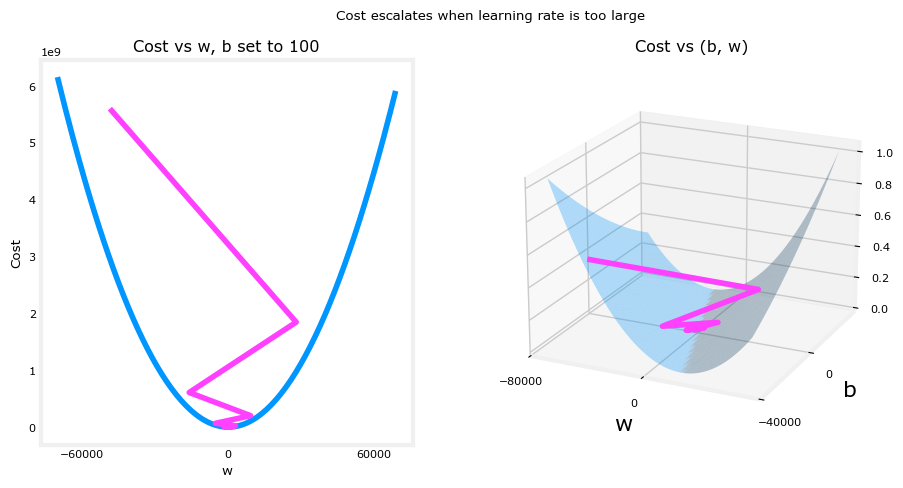

In [38]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()